<a href="https://colab.research.google.com/github/voynow/finance/blob/main/preliminary_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How well can we predict direction of price change using raw price data and a basic neural network?
This notebook serves as a baseline for any future modeling.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/finance
%pip install yfinance

/content/drive/MyDrive/finance
     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=519ea4a4f11de6f9ed497bb3ca9a31b00fad1d726286fbe1107a9eacd7e3de2f
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import data_utils
import model_exe

### First we will use 250 assets as prediction inputs.

In [4]:
data = data_utils.get_data(source="russell", size=250)
history = model_exe.run_classifier(data)

Using 250 symbols
Changing symbol JW.A to JW-A
[*********************100%***********************]  250 of 250 completed

Number Train Sequences: 180	total data: 449441
Number Test Sequences: 60	total data: 143564

Epoch 1/20
220/220 [==============================] - 5s 7ms/step - loss: 0.6929 - acc: 0.5103 - val_loss: 0.6925 - val_acc: 0.5149
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 0.6923 - acc: 0.5164 - val_loss: 0.6920 - val_acc: 0.5187
Epoch 3/20
220/220 [==============================] - 1s 6ms/step - loss: 0.6921 - acc: 0.5183 - val_loss: 0.6918 - val_acc: 0.5208
Epoch 4/20
220/220 [==============================] - 2s 7ms/step - loss: 0.6919 - acc: 0.5191 - val_loss: 0.6917 - val_acc: 0.5194
Epoch 5/20
220/220 [==============================] - 1s 6ms/step - loss: 0.6915 - acc: 0.5223 - val_loss: 0.6915 - val_acc: 0.5217
Epoch 6/20
220/220 [==============================] - 1s 6ms/step - loss: 0.6913 - acc: 0.5222 - val_loss: 0.6912 - val_acc: 0

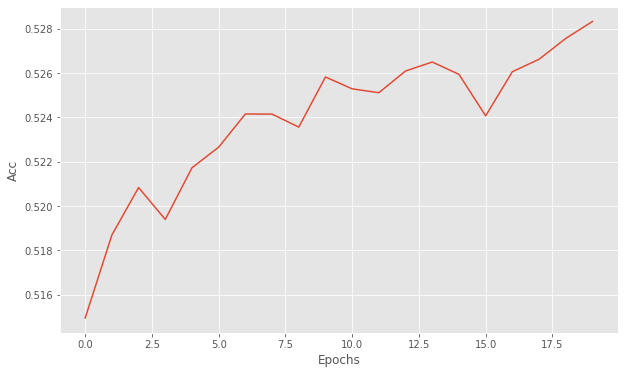

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history["val_acc"])

plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

### I wonder if adding more assets to our input will yield a significant increase in performance? Lets use 1000 assets, 4x more than our original experiment. 

In [15]:
data = data_utils.get_data(source="russell", size=1000)
history = model_exe.run_classifier(data)

Using 1000 symbols
Changing symbol MOG.A to MOG-A
Changing symbol BF.B to BF-B
Changing symbol LGF.B to LGF-B
Changing symbol LGF.A to LGF-A
Changing symbol CRD.B to CRD-B
Changing symbol BRK.B to BRK-B
[*********************100%***********************]  1000 of 1000 completed

Number Train Sequences: 713	total data: 1811207
Number Test Sequences: 237	total data: 599065

Epoch 1/20
885/885 [==============================] - 6s 6ms/step - loss: 0.6928 - acc: 0.5153 - val_loss: 0.6917 - val_acc: 0.5220
Epoch 2/20
885/885 [==============================] - 5s 6ms/step - loss: 0.6919 - acc: 0.5212 - val_loss: 0.6910 - val_acc: 0.5227
Epoch 3/20
885/885 [==============================] - 6s 6ms/step - loss: 0.6912 - acc: 0.5229 - val_loss: 0.6906 - val_acc: 0.5231
Epoch 4/20
885/885 [==============================] - 6s 7ms/step - loss: 0.6910 - acc: 0.5247 - val_loss: 0.6902 - val_acc: 0.5274
Epoch 5/20
885/885 [==============================] - 6s 6ms/step - loss: 0.6905 - acc: 0.5254 - v

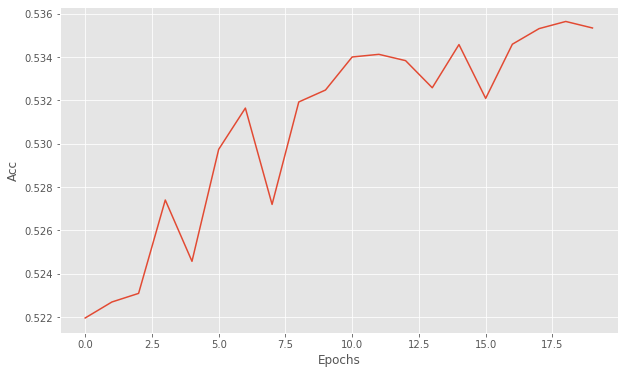

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(history.history["val_acc"])

plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

### In the experiment with more data, our accuracy increases only slightly (less than one percent). If adding more data does not yield better results, than what will? We will investigate this in future experiements.